####

#### Project 5 - Neural Networks for Character Recognition

In [1]:
using PyPlot, Random, LinearAlgebra, Optim   # Packages needed

In [4]:

charstr = """
          OOOOOO  OOOOOO  OOOOOO  OO..OO
          OOOOOO  OOOOOO  OOOOOO  OO..OO
          O.OO.O  OO..OO  ..OO..  OO..OO
          O.OO.O  OO..OO  ..OO..  OOOOOO
          O....O  OOOOOO  ..OO..  OO..OO
          O....O  OO..OO  ..OO..  OO..OO
          O... O  OO..OO  ..OO..  OO..OO
          """

training = reshape(collect(charstr), :, 7)
training = Int.(training[[1:6;9:14;17:22;25:30],:] .== 'O')
training = reshape(training', 7*6, 4)
target = [0 0; 0 1; 1 0; 1 1]'
mapstr = "MATH";

function plot_chars(images)
    gray()
    n_images = size(images,2)
    for j = 1:n_images
        subplot(ceil(Int, n_images/4), 4, j)
        im = 1 .- reshape(images[:,j], 7, 6)
        imshow(im); axis("off");
    end
end

plot_chars (generic function with 1 method)

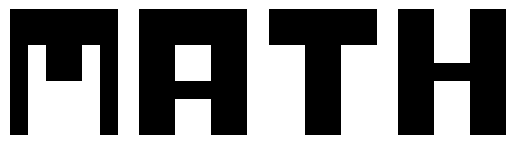

In [5]:
plot_chars(training)

In [32]:
function make_testdata(training)
    testdata = [training training training training training]
    for i in 1:4
        for j in 1:4
            p = rand(1:42,i*2)
            testdata[p,j+4*(i)] = abs.(training[p,j].-1)
        end
    end
    return testdata
end

make_testdata (generic function with 1 method)

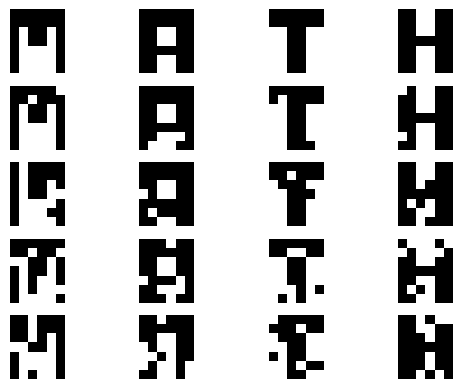

In [33]:
testdata = make_testdata(training);
plot_chars(testdata)

42×16 Matrix{Int64}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  0  1  1  1  0  1  1  1  0  1  1  1  0  1
 1  1  0  1  1  1  0  1  1  1  0  1  1  1  0  1
 1  1  0  1  1  1  0  1  1  1  0  1  1  1  0  1
 1  1  0  1  1  1  0  1  1  1  0  1  1  1  0  1
 1  1  0  1  1  1  0  1  1  1  0  1  1  1  0  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 ⋮              ⋮              ⋮              ⋮
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  